In this project, we will use CNN (Convolutional Neural Network) to build train and test traffic sign classification model. we will build this model using tensorflow and keras. It is a multiclass classification problem. This Model can be used to make smarter cars.

In [2]:
# Run this cell and select the kaggle.json file downloaded from the kaggle account setting page.

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sunnypaul","key":"e30f380557c93892a0e1739b8523495b"}'}

we will start by connecting to kaggle using kaggle API which can be downloaded from your kaggle account setting and uploading it here (upload box)

In [3]:
# next, install the kaggle API clint

!pip install -q kaggle 

In [4]:
# The kaggle API client expects this file to be in ~/ .kaggle, so move it there.

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#This permission change avoids a warning on kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json 

In [5]:
# Creating directory and changing the current working directory

!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [6]:
# searching dataset on kaggle
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          46128  
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           7198  
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            240  
valentynsichkar/traffic-signs-1-million-images-for-classification  Traffic Signs 1 million images for Classification   20GB  2021-02-08 16:45:43            176  
bhavinmoriya/german-traffic-

In [7]:
# Downloading dataset and coming out of directory 
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

 98% 601M/612M [00:03<00:00, 190MB/s]
100% 612M/612M [00:03<00:00, 165MB/s]
/content


In [8]:
# Unzipping downloaded file and removing unusable file 

!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta 
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [42]:
#Importing libraries 

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns 
import random 
from PIL import Image 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D 

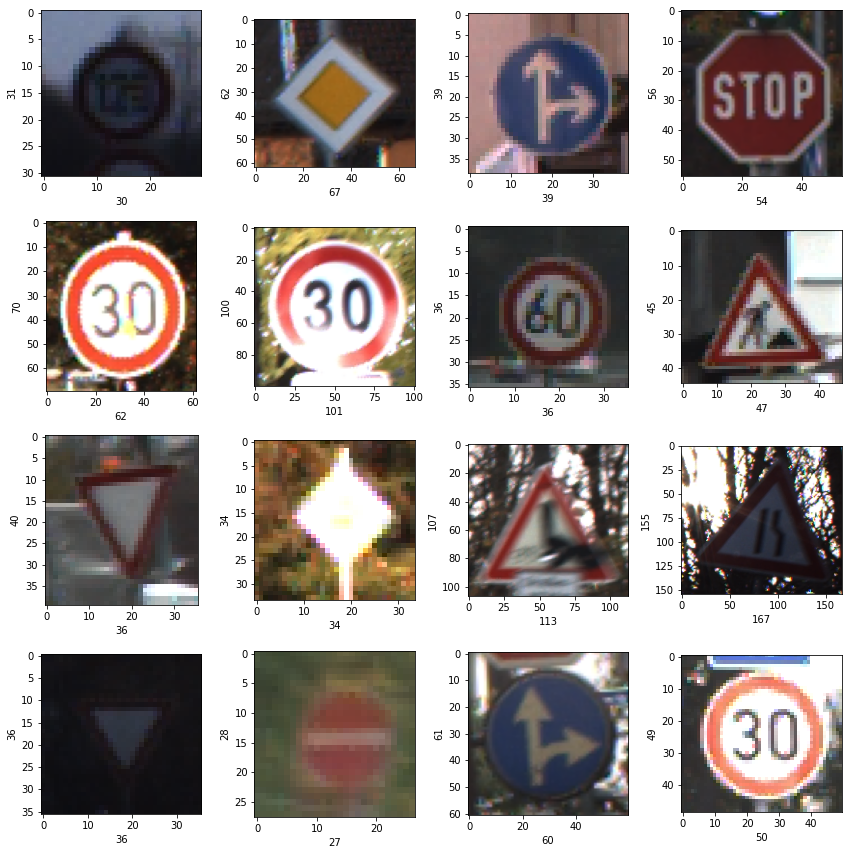

In [10]:
# Plotting 12 images to check dataset 
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) #width of image 
  plt.ylabel(rand_img.shape[0], fontsize = 10) #height of image

In [11]:
# As sign of images are different we have to make them equal so we will take mean of dimensions 

dim1 = []
dim2 = []

for i in range(0, 43): 
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path: 
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [12]:
# Printing mean dimension of images 
print("Dimension 1 Mean : ", np.mean(dim1), "Dimension 2 Mean : ", np.mean(dim2))

Dimension 1 Mean :  50.328929582493814 Dimension 2 Mean :  50.83587951745773


In [13]:
# Now we will reshape the images to (50, 50)

images = []
label_id = []

for i in range(43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [14]:
# Converting images into numpy array 
images = np.array(images)

#The pixel value of each image ranges between 0 and 255 
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255

In [15]:
label_id = np.array(label_id)
label_id.shape 

(39209,)

In [16]:
images.shape 

(39209, 50, 50, 3)

Here we can see that their are 39209 images with a shape of (50, 50, 3)

In [17]:
# visualize the number fo classes count

label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [18]:
# Splitting the data 

x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size = 0.2, random_state = 42)

In [19]:
# keras has a built in function for one hot encoding.

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [20]:
# Now defining the model architecture- In this we will define all the layers with their input shape kernel size, activation... etc

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [21]:
# compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [22]:
# fit the model

model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/50
246/246 - 20s - loss: 2.3454 - accuracy: 0.3508 - val_loss: 1.0523 - val_accuracy: 0.7330 - 20s/epoch - 81ms/step
Epoch 2/50
246/246 - 7s - loss: 1.0047 - accuracy: 0.6865 - val_loss: 0.4368 - val_accuracy: 0.9017 - 7s/epoch - 28ms/step
Epoch 3/50
246/246 - 7s - loss: 0.6463 - accuracy: 0.7936 - val_loss: 0.2344 - val_accuracy: 0.9584 - 7s/epoch - 28ms/step
Epoch 4/50
246/246 - 7s - loss: 0.4955 - accuracy: 0.8410 - val_loss: 0.1579 - val_accuracy: 0.9690 - 7s/epoch - 28ms/step
Epoch 5/50
246/246 - 7s - loss: 0.4121 - accuracy: 0.8668 - val_loss: 0.1141 - val_accuracy: 0.9788 - 7s/epoch - 28ms/step
Epoch 6/50
246/246 - 7s - loss: 0.3551 - accuracy: 0.8868 - val_loss: 0.1022 - val_accuracy: 0.9781 - 7s/epoch - 28ms/step
Epoch 7/50
246/246 - 7s - loss: 0.3112 - accuracy: 0.9002 - val_loss: 0.0870 - val_accuracy: 0.9815 - 7s/epoch - 28ms/step
Epoch 8/50
246/246 - 7s - loss: 0.2858 - accuracy: 0.9090 - val_loss: 0.0793 - val_accuracy: 0.9858 - 7s/epoch - 28ms/step
Epoch 9/50
246

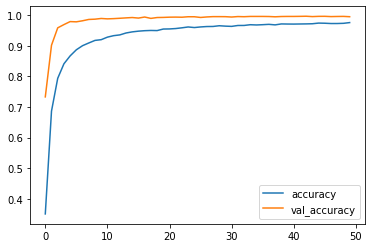

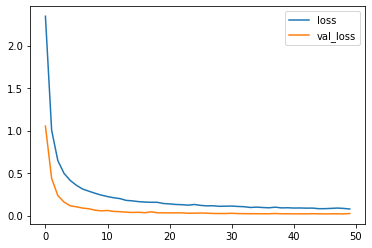

In [24]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

Creating the variable which has path of test dataset. As we downloaded the dataset we found out that their is a GT-final_Test.csv file in the test images folder which can not be processed. so we will remove that file. 

Testing the Model

we have test folder which contains different set of images and we also have the respective set of labels. Again we will load all the images and resize them to shape of 30303 And create a Numpy array containing all image data. We will use sklearn accuracy score to check that our model predict or not actual label with 95% accuracy.

In [38]:
from sklearn.metrics import accuracy_score
import pandas as pd
test = pd.read_csv("traffic_sign_dataset/Test.csv")
print(test.shape)
test.head()

(12630, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [39]:
test_labels = test['ClassId'].values
test_img_path = "traffic_sign_dataset"
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((50,50))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)

(12630, 50, 50, 3)


In [40]:
import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_labels

array([16,  1, 38, ...,  6,  7, 10])

In [45]:
#predict the output on test data
predictions = model.predict(test_data)
classes = np.argmax(predictions, axis=1)
print("accuracy: ", accuracy_score(test_labels, classes))

accuracy:  0.9324623911322248


In [46]:
model.save('traffic_classifier.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')